In [190]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/foster_2020
%cd foster_2020/Homeworks

Cloning into 'foster_2020'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 284 (delta 54), reused 147 (delta 27), pack-reused 109
Receiving objects: 100% (284/284), 59.55 MiB | 22.17 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (120/120), done.
/content/foster_2020/Homeworks/foster_2020/Homeworks


# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [0]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "./data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

In [192]:
train_col=list(df.columns[:-1])
test_col=df.columns[-1]
print(train_col,test_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'] Churn_Yes


__2. Split the data into 80% training data and 20% test data.__

In [0]:
# Your code goes here
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df[train_col],df[test_col],test_size=0.2,random_state=42)

__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

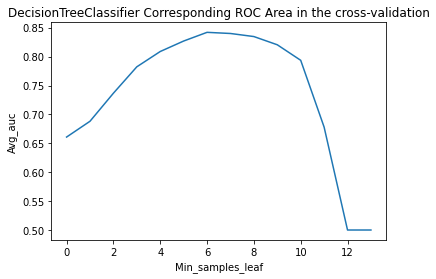

In [195]:
# decison tree classifier -- param: min_samples_leaf
def decision_tree_classifier(x,y,regs):
  rst=[]
  for i in range(len(regs)):
    reg=regs[i]
    model=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2**reg)
    avg_auc=cross_val_score(model, x, y, cv=10, scoring="roc_auc").mean()
    rst.append(avg_auc)
  return rst
dregs=range(0,14,1)
drst=decision_tree_classifier(X_train,Y_train,dregs)
min_sf=[i for i in dregs]
plt.plot(min_sf, drst)
plt.xlabel("Min_samples_leaf")
plt.ylabel("Avg_auc")
plt.title("DecisionTreeClassifier Corresponding ROC Area in the cross-validation")
plt.show()


In [196]:
dmaxv,dindex=0,0
for i in range(len(drst)):
  if drst[i]>dmaxv:
    dmaxv=drst[i]
    dindex=i
print('the best paramter value: min samples leaf = %d,  max value of Avg_auc = %0.4f'%(2**dindex,dmaxv))


the best paramter value: min samples leaf = 64,  max value of Avg_auc = 0.8420


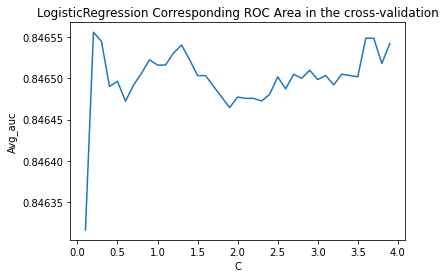

In [197]:
# logistic regression -- param: C
def logistic_regression(x,y,regs):
  rst=[]
  for i in range(len(regs)):
    reg=regs[i]
    model=LogisticRegression(C=reg, solver="liblinear",max_iter=10000)
    avg_auc=cross_val_score(model, x, y, cv=10, scoring="roc_auc").mean()
    rst.append(avg_auc)
  return rst
lregs=np.arange(0.1,4.0,0.1)
lrst=logistic_regression(X_train,Y_train,lregs)
c=[i for i in lregs]
plt.plot(c, lrst)
plt.xlabel("C")
plt.ylabel("Avg_auc")
plt.title("LogisticRegression Corresponding ROC Area in the cross-validation")
plt.show()


In [198]:
lmaxv,lindex=0,0
lregs=np.arange(0.1,3.0,0.01)
for i in range(len(lrst)):
  if lrst[i]>lmaxv:
    lmaxv=lrst[i]
    lindex=lregs[i]
print('the best paramter value: C = %0.1f,  max value of Avg_auc = %0.4f'%(lindex,lmaxv))


the best paramter value: C = 0.1,  max value of Avg_auc = 0.8466


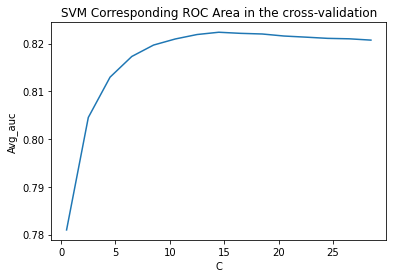

In [199]:
def SVM(x,y,regs):
  rst=[]
  for i in range(len(regs)):
    reg=regs[i]
    model=SVC(C=reg)
    avg_auc=cross_val_score(model, x, y, cv=10, scoring="roc_auc").mean()
    rst.append(avg_auc)
  return rst
sregs=np.arange(0.5,30,2)
srst=SVM(X_train,Y_train,sregs)
c=[i for i in sregs]
plt.plot(c, srst)
plt.xlabel("C")
plt.ylabel("Avg_auc")
plt.title("SVM Corresponding ROC Area in the cross-validation")
plt.show()

In [200]:
smaxv,sindex=0,0
for i in range(len(srst)):
  if srst[i]>smaxv:
    smaxv=srst[i]
    sindex=i
print('the best paramter value: C = %d,  max value of Avg_auc = %0.4f'%(sindex,smaxv))


the best paramter value: C = 7,  max value of Avg_auc = 0.8224


**ANSWER**

**The best predict accuracy of those three models are 0.8420, 0.8466, 0.8224. So our choice is logistic regression model with paramter C equals to 0.1**

__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

{'SVM': SVC(C=7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'Logistic Regression': LogisticRegression(C=0.11, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'Decison Tree Classifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=64, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='d

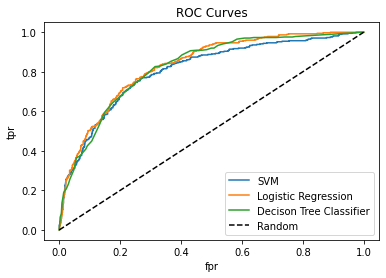

In [207]:
def ROC_Curve(models):
  for key in models:
    model=models[key]
    model.fit(X_train,Y_train)
    Y_test_Probability_1=model.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=metrics.roc_curve(Y_test,Y_test_Probability_1)
    Avg_auc=np.mean(cross_val_score(model, X_train, Y_train, cv=10, scoring="roc_auc").mean())
    plt.plot(fpr,tpr,label=key)
  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.plot([0,1],[0,1],'k--',label='Random')
  plt.title("ROC Curves")
  plt.legend()
  plt.show()
models = {"SVM":SVC(C=sindex,probability=True),"Logistic Regression": LogisticRegression(C=lindex, solver="liblinear",max_iter=10000),"Decison Tree Classifier":DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2**dindex)}
print(models)
ROC_Curve(models)


**ANSWER**

**We do not need to change the function because the logistic regression function still shows the best peroformance amont the three models**

__5. What would be the potential benefit of stopping someone from leaving? HINT: Take a look at the description of the data and the retention offer.__

**ANSWER**:


the potential benefit of stopping someone from leaving is the revenue saved minus the cost. For the revenue part, it equals to monthly charge multiply 12 months when the customer extends his/her contrat. But if the customer leave, revenue would be 0. So the revenue equals to ***monthly charge * 12 months * whether to extend contract( test col) ***. For the cost part, every retention offer cost 200 $.

*** In summary,  each profit = each MonthlyCharge * 12 * test_col ***

__6. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.__

In [0]:
def plot_profit_curve1(datax,datay,testx,testy,rentention_percentage):
  n=int(rentention_percentage*len(testy))
  model=LogisticRegression(C=lindex, solver="liblinear",max_iter=10000)
  model.fit(datax,datay) 
  probabilities=model.predict_proba(testx)[:,1]
  order=np.argsort(probabilities)[::-1]
  probabilities_sorted=probabilities[order]
  newtestx=testx.copy()
  newtestx['Profit']=testx.MonthlyCharges*12*testy-200
  newtestx_sorted=np.array(newtestx)[order]
  X_cumulative=np.arange(1,len(probabilities)+1)
  Y_cumulative=np.cumsum(newtestx_sorted[:,-1])
  plt.plot(X_cumulative*100/len(testy),Y_cumulative)
  max_profit,percentage=0,0
  plt.xlabel("Percentage of clients targeted")
  plt.ylabel("Profits")
  plt.title("Profit curve According to Profitability")
  plt.legend()
  plt.show()
  for i in range(len(Y_cumulative)):
    if Y_cumulative[i]>max_profit:
      max_profit=Y_cumulative[i]
      percentage=X_cumulative[i]*100/len(testy)
  print('\nThe maximum of profit gained will be $'+str(max_profit)+' , the percentage of clients targeted will be '+str(percentage)+' %\n')
  print("\nThreshold of judging to be 1 is: "+str(probabilities_sorted[n-1])+ " , prediction probabilities greated than this threthod will be asssumed to be positive(1).\n")
  print("\nProfit gained by giving rentention offer to 25% will be $"+str(Y_cumulative[n-1])+'\n')

  

No handles with labels found to put in legend.


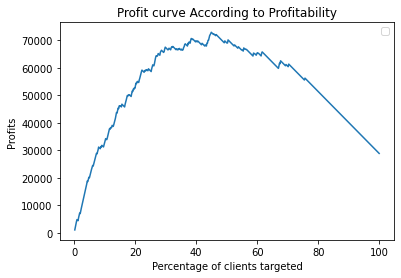


The maximum of profit gained will be $72939.4 , the percentage of clients targeted will be 44.93783303730018 %


Threshold of judging to be 1 is: 0.5085747077442587 , prediction probabilities greated than this threthod will be asssumed to be positive(1).


Profit gained by giving rentention offer to 25% will be $59034.799999999996



In [203]:
X_subtrain,X_validation,Y_subtrain,Y_validation=train_test_split(X_train,Y_train,test_size=0.1,random_state=42)
plot_profit_curve1(X_subtrain,Y_subtrain,X_validation,Y_validation,0.25)

**ANSWER:**

**Recomendation is that to target those customers with prediction probability greated than 0.509, and the saved profit will be more than 59k**

__7. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

**ANSWER:**

For a second choice, we rank according to the **Probability multiply MonthlyCharges** from high to low.The max profit in answer 6 with retention rate of 25% is about 59k. However, max profit gained in this function of answer 7 with 25% retention rate is about 62k which is greater than the former one, though from max profit perspective, it is not. **That is to say, this method is better than the first one if the company would like to target only 25% clients**.

In [0]:
def plot_profit_curve2(datax,datay,testx,testy,rentention_percentage):
  n=int(rentention_percentage*len(testy))
  model=LogisticRegression(C=lindex, solver="liblinear",max_iter=10000)
  model.fit(datax,datay) 
  probabilities=model.predict_proba(testx)[:,1]
  revenue=np.array(testx.MonthlyCharges)
  prob_rev=probabilities*revenue # new ranking method
  order=np.argsort(prob_rev)[::-1]
  probabilities_sorted=probabilities[order]
  newtestx=testx.copy()
  newtestx['Profit']=testx.MonthlyCharges*12*testy-200
  newtestx_sorted=np.array(newtestx)[order]
  X_cumulative=np.arange(1,len(probabilities)+1)
  Y_cumulative=np.cumsum(newtestx_sorted[:,-1])
  plt.plot(X_cumulative*100/len(testy),Y_cumulative)
  max_profit,percentage=0,0
  plt.xlabel("Percentage of clients targeted")
  plt.ylabel("Profits")
  plt.title("Profit curve According to Profitability")
  plt.legend()
  plt.show()
  for i in range(len(Y_cumulative)):
    if Y_cumulative[i]>max_profit:
      max_profit=Y_cumulative[i]
      percentage=X_cumulative[i]*100/len(testy)
  print('\nThe maximum of profit gained will be $'+str(max_profit)+' , the percentage of clients targeted will be '+str(percentage)+' %\n')
  print("\nThreshold of judging to be 1 is: "+str(probabilities_sorted[n-1])+ " , prediction probabilities greated than this threthod will be asssumed to be positive(1).\n")
  print("\nProfit gained by giving rentention offer to 25% will be $"+str(Y_cumulative[n-1])+'\n')


No handles with labels found to put in legend.


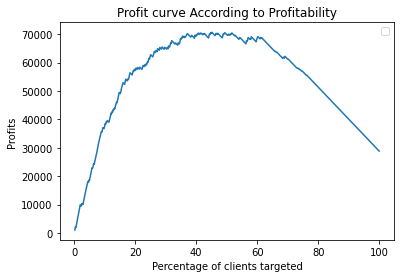


The maximum of profit gained will be $70684.99999999999 , the percentage of clients targeted will be 45.11545293072824 %


Threshold of judging to be 1 is: 0.5006283859626365 , prediction probabilities greated than this threthod will be asssumed to be positive(1).


Profit gained by giving rentention offer to 25% will be $62018.599999999984



In [205]:
plot_profit_curve2(X_subtrain,Y_subtrain,X_validation,Y_validation,0.25)

__8. Now the you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?__

No handles with labels found to put in legend.


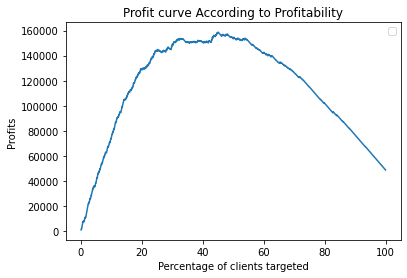


The maximum of profit gained will be $158659.59999999992 , the percentage of clients targeted will be 45.06041222459133 %


Threshold of judging to be 1 is: 0.48246393429521933 , prediction probabilities greated than this threthod will be asssumed to be positive(1).


Profit gained by giving rentention offer to 25% will be $144283.79999999993



In [206]:
plot_profit_curve2(X_train,Y_train,X_test,Y_test,0.25)

**ANSWER**:

**Since we only need to target 25% clients, a better choice is ranking according to monthly charge multiply prediction probabilities. We use function plot_profit_curve2 to make a calculation. And the result shows that the company should target those consumers with more than 0.4825 prediction probability in order to gain the saved profit of $ 144k.**